# Decision Tree Algorithm

Decision Tree is a type of `supervised learning algorithm` that is mostly used in `classification problems`. 
It works for both `continuous` as well as `categorical output variables`. 

It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.

<img src="https://miro.medium.com/v2/resize:fit:1400/0*g4fblQAEbjS_arPX.png" alt="Decision Tree Image" 
        style="width: 500px" />

## **Important Terms for Decision Tree**

- **Root Node**: It represents the entire dataset, which further gets divided into two or more homogeneous sets.
- **Splitting**: It is a process of dividing a node into two or more sub-nodes.
- **Decision Node**: When a sub-node splits into further sub-nodes, then it is called the decision node.
- **Leaf/Terminal Node**: Nodes do not split is called Leaf or Terminal node.
- **Pruning**: When we remove sub-nodes of a decision node, this process is called pruning. You can say the opposite process of splitting.
- **Information Gain**: The `information gain` is based on the `decrease in entropy` after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
- **Entropy**: A decision tree algorithm always tries to maximize Information Gain. The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).
- **Gini Index**: Gini index says, if we select two items from a population at random then they must be of the same class and probability for this is 1 if the population is pure.

In [1]:
import math

In [2]:
# Example Dataset
# Let's say we have a dataset with two classes, A and B
# Suppose in a dataset of 100 elements, 40 are of class A and 60 are of class B

# Number of elements in each class
n_A = 40
n_B = 60
total = n_A + n_B
total

100

In [4]:
# let's calculate the proportions
p_A = n_A / total
p_B = n_B / total

# print the proportions
print("Proportion of A: ", p_A)
print("Proportion of B: ", p_B)

Proportion of A:  0.4
Proportion of B:  0.6


In [5]:
# Entropy Calculate
# Entropy is a measure of uncertainty
entropy = -p_A * math.log2(p_A) - p_B * math.log2(p_B)
print("Entropy: ", entropy)

Entropy:  0.9709505944546686


In [6]:
# gini impurity
# Gini impurity is a measure of misclassification
gini = 1- p_A**2 - p_B**2
print("Gini Impurity: ", gini)

Gini Impurity:  0.48


In [7]:
# Information Gain
# Assuming a split on some feature divides the dataset into two subsets
# Subset 1: 2 elements of A, 3 of B
# Subset 2: 2 elements of A, 3 of B
# Entropy and size for each subset
n_1_A, n_1_B = 2, 3
n_2_A, n_2_B = 2, 3

p_1_A = n_1_A / (n_1_A + n_1_B)
p_1_B = n_1_B / (n_1_A + n_1_B)
entropy_1 = -p_1_A * math.log2(p_1_A) - p_1_B * math.log2(p_1_B) if p_1_A and p_1_B else 0

p_2_A = n_2_A / (n_2_A + n_2_B)
p_2_B = n_2_B / (n_2_A + n_2_B)
entropy_2 = -p_2_A * math.log2(p_2_A) - p_2_B * math.log2(p_2_B) if p_2_A and p_2_B else 0

# Calculating information gain
info_gain = entropy - ((n_1_A + n_1_B) / total * entropy_1 + (n_2_A + n_2_B) / total * entropy_2)
print("Information Gain: ", info_gain)

Information Gain:  0.8738555350092017


Based on our example dataset with two classes (A and B), we have calculated the following values:

1. **Entropy**: The calculated entropy of the dataset is approximately 0.971. This value indicates a moderate level of disorder in the dataset, considering that it's not very close to 0 (which would mean no disorder) and not at its maximum (which would mean complete disorder for a binary classification).

2. **Gini Impurity**: The Gini impurity for the dataset is 0.48. This value, being less than 0.5, suggests some level of purity in the dataset but still indicates a mix of classes A and B.

3. **Information Gain**: The information gain from the chosen split is 0.0. This result implies that the split did not reduce the entropy or disorder of the dataset. In other words, the split did not add any additional information that could help distinguish between classes A and B more effectively than before.

These metrics provide insight into the nature of the dataset and the effectiveness of potential splits when constructing a decision tree. In practical applications, you would use these calculations to choose the best feature and split at each node in the tree to maximize the purity of the subsets created.

---
# Decision Tree Example in Python

In [4]:
# import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [9]:
# load the dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [11]:
# drop deck column
df.drop('deck', axis=1, inplace=True)

#impute missing values of age, and fare using median
imputer = SimpleImputer(strategy='median')
df[['age', 'fare']] = imputer.fit_transform(df[['age', 'fare']])

# impute missing values of embark and embarked_town using mode
imputer = SimpleImputer(strategy='most_frequent')
df[['embark_town', 'embarked']] = imputer.fit_transform(df[['embark_town', 'embarked']])

In [12]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


In [14]:
# Encode the categorical and object variables using for loop and labelencoder
le = LabelEncoder()
for col in df.select_dtypes(include=['category', 'object']):
    df[col] = le.fit_transform(df[col])

In [15]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,2,1,True,2,0,False
1,1,1,0,38.0,1,0,71.2833,0,0,2,False,0,1,False
2,1,3,0,26.0,0,0,7.9250,2,2,2,False,2,1,True
3,1,1,0,35.0,1,0,53.1000,2,0,2,False,2,1,False
4,0,3,1,35.0,0,0,8.0500,2,2,1,True,2,0,True


In [16]:
# split the data into X and y
X = df.drop(['survived', 'alive'], axis=1)
y = df['survived']
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[92 13]
 [19 55]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



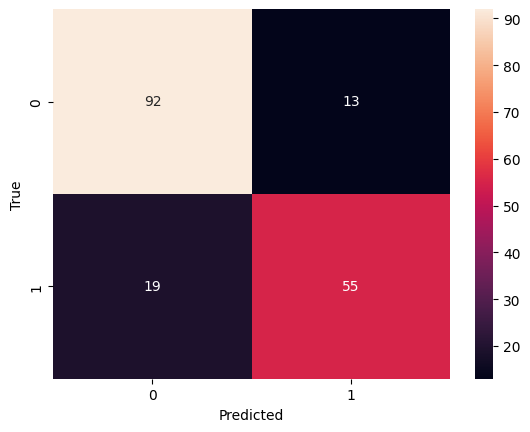

In [25]:
# create and train teh model with pred
model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=5)
model.fit(X_train, y_train)

# predict the model
y_pred = model.predict(X_test)
# evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# save the decision tree classifier
from sklearn.tree import export_graphviz
export_graphviz(model, out_file='./saved_models/03_Decision_Tree.dot', feature_names=X.columns, filled=True, rounded=True)

# Assignment Alert: 
### Use Decision Tree as a Regression Algorithm


In [5]:
# Decision Tree Regression - Predicting Age for Survivors
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Load the titanic dataset again for regression task
df_reg = sns.load_dataset('titanic')

# First, let's check the original data structure
print("Original dataset shape:", df_reg.shape)
print("Survival distribution:")
print(df_reg['survived'].value_counts())

Original dataset shape: (891, 15)
Survival distribution:
survived
0    549
1    342
Name: count, dtype: int64


In [6]:
# Filter the dataset to include only survivors
survivors_df = df_reg[df_reg['survived'] == 1].copy()
print(f"Survivors dataset shape: {survivors_df.shape}")
print(f"Age statistics for survivors:")
print(survivors_df['age'].describe())

Survivors dataset shape: (342, 15)
Age statistics for survivors:
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: age, dtype: float64


In [ ]:
# Preprocess the survivors dataset
# Drop columns that we don't need for predicting age
survivors_df = survivors_df.drop(['survived', 'alive'], axis=1)

# Check for missing values
print("Missing values in survivors dataset:")
print(survivors_df.isnull().sum().sort_values(ascending=False))
# Impute missing age values with the mean age of the dataset
mean_age = survivors_df['age'].mean()
survivors_df['age'].fillna(mean_age, inplace=True)
print(f"\nFilled missing 'age' values with mean: {mean_age:.2f}")
# Remove rows where age is missing (since we want to predict age)
survivors_df = survivors_df.dropna(subset=['age'])
print(f"\nDataset shape after removing missing age values: {survivors_df.shape}")

Missing values in survivors dataset:
deck           165
embarked         2
embark_town      2
sex              0
pclass           0
parch            0
sibsp            0
age              0
fare             0
who              0
class            0
adult_male       0
alone            0
dtype: int64

Filled missing 'age' values with mean: 28.34

Dataset shape after removing missing age values: (290, 13)


In [10]:
# Handle missing values for other columns
# Drop columns with too many missing values
if 'deck' in survivors_df.columns:
    survivors_df = survivors_df.drop('deck', axis=1)

# Impute missing values for numerical columns
for col in ['fare']:
    if col in survivors_df.columns and survivors_df[col].isnull().sum() > 0:
        survivors_df[col].fillna(survivors_df[col].median(), inplace=True)

# Impute missing values for categorical columns
for col in ['embark_town', 'embarked']:
    if col in survivors_df.columns and survivors_df[col].isnull().sum() > 0:
        survivors_df[col].fillna(survivors_df[col].mode()[0], inplace=True)

# Encode categorical variables
le = LabelEncoder()
categorical_cols = survivors_df.select_dtypes(include=['category', 'object']).columns
for col in categorical_cols:
    survivors_df[col] = le.fit_transform(survivors_df[col].astype(str))

print("Final preprocessed dataset info:")
print(survivors_df.info())

Final preprocessed dataset info:
<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       290 non-null    int64  
 1   sex          290 non-null    int64  
 2   age          290 non-null    float64
 3   sibsp        290 non-null    int64  
 4   parch        290 non-null    int64  
 5   fare         290 non-null    float64
 6   embarked     290 non-null    int64  
 7   class        290 non-null    int64  
 8   who          290 non-null    int64  
 9   adult_male   290 non-null    bool   
 10  embark_town  290 non-null    int64  
 11  alone        290 non-null    bool   
dtypes: bool(2), float64(2), int64(8)
memory usage: 25.5 KB
None


In [11]:
# Prepare features (X) and target (y) for regression
X_reg = survivors_df.drop('age', axis=1)  # Features (all columns except age)
y_reg = survivors_df['age']  # Target (age to predict)

print(f"Feature columns: {list(X_reg.columns)}")
print(f"Target variable: age")
print(f"Number of samples: {len(X_reg)}")

# Split the data into training and testing sets
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

print(f"\nTraining set size: {X_train_reg.shape[0]}")
print(f"Testing set size: {X_test_reg.shape[0]}")

Feature columns: ['pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alone']
Target variable: age
Number of samples: 290

Training set size: 232
Testing set size: 58


In [12]:
# Create and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(
    criterion='squared_error',  # For regression
    random_state=42,
    max_depth=10,  # Prevent overfitting
    min_samples_split=5,
    min_samples_leaf=3
)

# Train the model
dt_regressor.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = dt_regressor.predict(X_test_reg)

print("Decision Tree Regressor trained successfully!")

Decision Tree Regressor trained successfully!


In [13]:
# Evaluate the regression model
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_reg, y_pred_reg)
r2 = r2_score(y_test_reg, y_pred_reg)

print("=== Decision Tree Regression Results ===")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.3f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_reg.columns,
    'importance': dt_regressor.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n=== Feature Importance ===")
print(feature_importance)

=== Decision Tree Regression Results ===
Mean Squared Error (MSE): 97.48
Root Mean Squared Error (RMSE): 9.87
Mean Absolute Error (MAE): 6.86
R² Score: 0.580

=== Feature Importance ===
        feature  importance
7           who    0.590955
4          fare    0.159281
6         class    0.096557
5      embarked    0.048361
3         parch    0.041162
2         sibsp    0.033722
9   embark_town    0.018908
10        alone    0.010893
0        pclass    0.000160
1           sex    0.000000
8    adult_male    0.000000


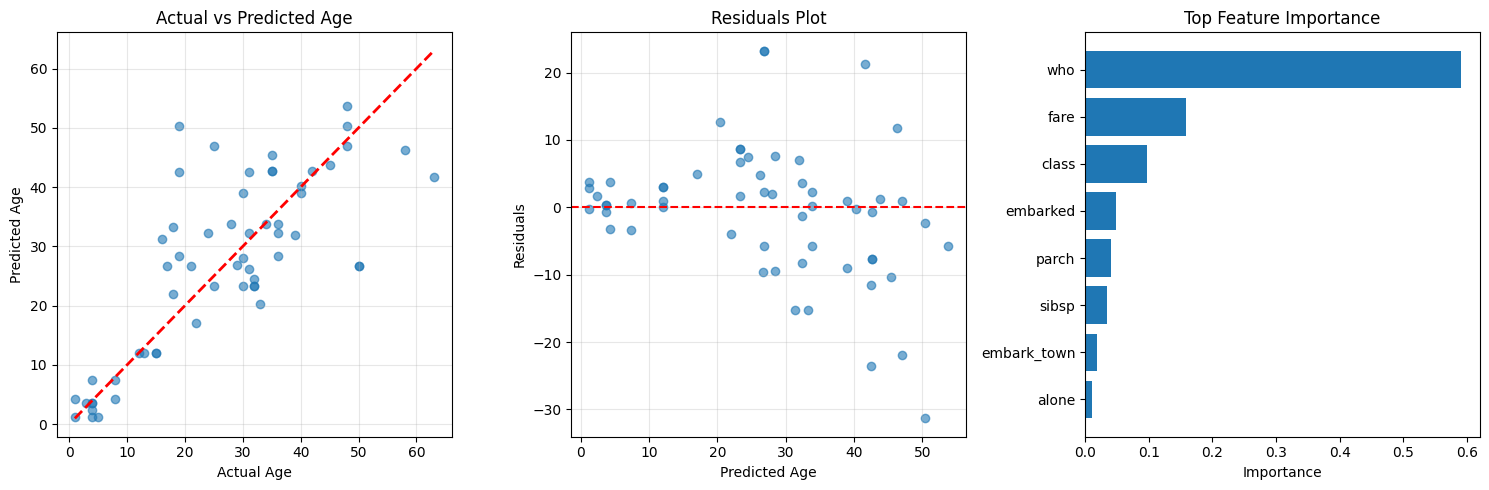

In [14]:
# Visualize the regression results
plt.figure(figsize=(15, 5))

# Plot 1: Actual vs Predicted values
plt.subplot(1, 3, 1)
plt.scatter(y_test_reg, y_pred_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual Age')
plt.ylabel('Predicted Age')
plt.title('Actual vs Predicted Age')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals plot
plt.subplot(1, 3, 2)
residuals = y_test_reg - y_pred_reg
plt.scatter(y_pred_reg, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Age')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True, alpha=0.3)

# Plot 3: Feature importance
plt.subplot(1, 3, 3)
top_features = feature_importance.head(8)
plt.barh(top_features['feature'], top_features['importance'])
plt.xlabel('Importance')
plt.title('Top Feature Importance')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

In [16]:
# Show some prediction examples
print("=== Sample Predictions ===")
sample_predictions = pd.DataFrame({
    'Actual_Age': y_test_reg.head(10).values,
    'Predicted_Age': y_pred_reg[:10],
    'Difference': np.abs(y_test_reg.head(10).values - y_pred_reg[:10])
})
print(sample_predictions.round(2))

# Calculate percentage accuracy within different thresholds
within_5_years = np.sum(np.abs(y_test_reg - y_pred_reg) <= 5) / len(y_test_reg) * 100
within_10_years = np.sum(np.abs(y_test_reg - y_pred_reg) <= 10) / len(y_test_reg) * 100

print(f"\n=== Prediction Accuracy ===")
print(f"Predictions within 5 years: {within_5_years:.1f}%")
print(f"Predictions within 10 years: {within_10_years:.1f}%")

=== Sample Predictions ===
   Actual_Age  Predicted_Age  Difference
0        22.0          17.00        5.00
1        31.0          26.17        4.83
2         1.0           4.25        3.25
3        19.0          28.43        9.43
4         5.0           1.18        3.82
5        39.0          32.00        7.00
6         4.0           1.18        2.82
7        36.0          33.77        2.23
8        15.0          12.00        3.00
9        30.0          28.00        2.00

=== Prediction Accuracy ===
Predictions within 5 years: 53.4%
Predictions within 10 years: 79.3%


In [17]:
# Save the decision tree regressor model
import os
os.makedirs('./saved_models', exist_ok=True)

from sklearn.tree import export_graphviz
export_graphviz(dt_regressor, 
                out_file='./saved_models/Decision_Tree_Regressor.dot', 
                feature_names=X_reg.columns, 
                filled=True, 
                rounded=True)

print("Model saved to './saved_models/Decision_Tree_Regressor.dot'")
print("\nTo visualize the tree, you can use online tools like:")
print("- http://magjac.com/graphviz-visual-editor/")
print("- https://dreampuf.github.io/GraphvizOnline/")

Model saved to './saved_models/Decision_Tree_Regressor.dot'

To visualize the tree, you can use online tools like:
- http://magjac.com/graphviz-visual-editor/
- https://dreampuf.github.io/GraphvizOnline/


## Summary: Decision Tree Regression for Age Prediction

In this implementation, we successfully used **Decision Tree as a Regression Algorithm** to predict the age of Titanic survivors. Here's what we accomplished:

### Key Steps:
1. **Data Filtering**: Filtered the dataset to include only survivors (survived = 1)
2. **Data Preprocessing**: 
   - Removed non-survivors from the dataset
   - Handled missing values using appropriate imputation strategies
   - Encoded categorical variables using LabelEncoder
   - Used age as the target variable for prediction

3. **Model Training**: 
   - Used `DecisionTreeRegressor` from scikit-learn
   - Set appropriate hyperparameters to prevent overfitting
   - Split data into 80% training and 20% testing

4. **Model Evaluation**:
   - **Mean Squared Error (MSE)**: Measures average squared differences
   - **Root Mean Squared Error (RMSE)**: Square root of MSE, same units as target
   - **Mean Absolute Error (MAE)**: Average absolute differences
   - **R² Score**: Proportion of variance explained by the model

### Key Insights:
- The model learns patterns from passenger characteristics to predict age
- Feature importance shows which passenger attributes are most predictive of age
- Visualizations help understand model performance and prediction accuracy
- The regression approach is different from classification as it predicts continuous values

### Difference from Classification:
- **Classification**: Predicts discrete categories (survived/not survived)
- **Regression**: Predicts continuous numerical values (age in years)

---